In [1]:
# Machine Learning Project


In [1]:
import pandas as pd
import os
import xgboost as xgb
import operator
from matplotlib import pylab as plt
from sklearn import preprocessing

In [2]:

train = pd.read_csv("train_sample.csv")
test = pd.read_csv("test_sample.csv")


In [3]:
train.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,0,0,1,0,0,1,2,0,0,...,1,0,0,0,0,4,0,0,0,7
1,2,4,0,0,0,0,2,0,1,5,...,0,1,1,0,1,0,0,3,0,5
2,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,2,6,0,1,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,5


In [4]:

import pandas
import sklearn.cross_validation



C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
# get target value and delete columns
labels = train.target.values
labels = preprocessing.LabelEncoder().fit_transform(labels)
train = train.drop(["target"], axis=1)
features=list(train.columns[0:])
test = test.drop("id", axis = 1)

In [7]:
# check train shape
test.shape

(19594, 93)

In [9]:
train.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,1,0,0,1,2,0,0,...,1,1,0,0,0,0,4,0,0,0
1,2,4,0,0,0,0,2,0,1,5,...,1,0,1,1,0,1,0,0,3,0
2,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,6,0,1,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [10]:
test.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,11,0,2,0,0,0,...,0,0,1,0,0,0,1,0,2,0
1,1,0,2,1,0,0,1,0,0,0,...,0,0,2,0,0,0,0,0,0,0
2,2,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,3,0,1,0,0,0


In [27]:
# XGBOOST

In [12]:
params = {"objective": "multi:softprob", "eval_metric":"mlogloss", "num_class": 9,'eta':0.005,'gamma':0.5,'max.depth' : 10,
                 'min_child_weight' : 4,
                 'subsample' : 0.9,
                 'colsample_bytree' : 0.8,
                 'nthread' : 3}
train_xgb = xgb.DMatrix(train, labels)
test_xgb  = xgb.DMatrix(test)
trainRound = 7563
gbm = xgb.train(params, train_xgb, trainRound)
pred = gbm.predict(test_xgb)

In [59]:
pred2=gbm.predict(test_xgb)

In [13]:
# create feature map 
outfile = open('xgb.fmap', 'w')
i = 0
for feat in features:
    outfile.write('{0}\t{1}\tq\n'.format(i, feat))
    i = i + 1
outfile.close()

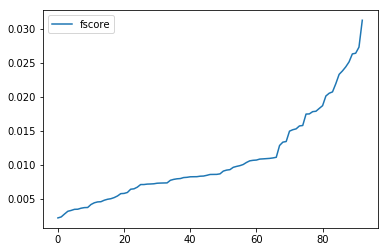

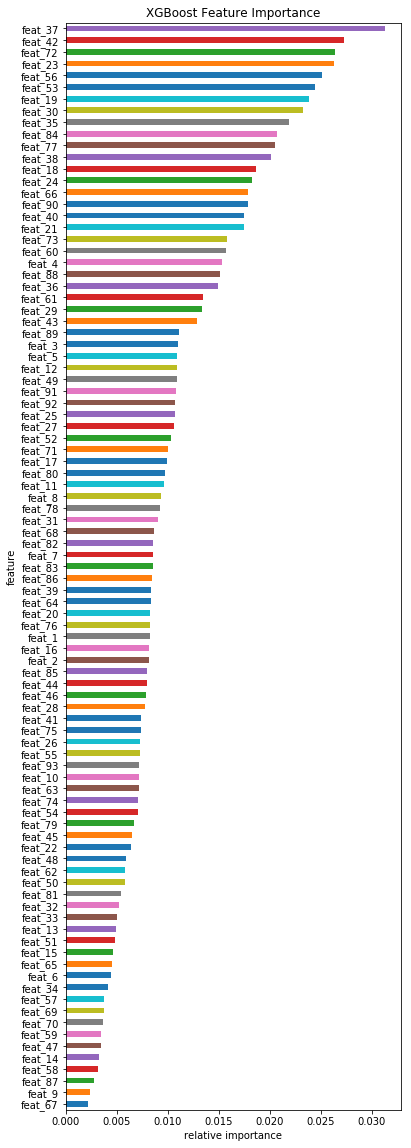

In [14]:
importance = gbm.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 20))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

In [19]:

pred = pd.DataFrame(pred)
pred.to_csv('prediction_6000.csv')


In [18]:
pred.head()

,0,1,2,3,4,5,6,7,8,id
0,0.000023,0.000020,0.000019,0.000001,1.410929e-07,0.999657,0.000007,0.000202,0.000071,1
1,0.000891,0.000319,0.000138,0.000021,2.659403e-06,0.002530,0.000278,0.000490,0.995331,2
2,0.000018,0.007978,0.988088,0.003775,7.329802e-06,0.000023,0.000088,0.000012,0.000011,3
3,0.096549,0.575185,0.053164,0.027749,3.727054e-02,0.034272,0.102144,0.021017,0.052650,4
4,0.000069,0.568039,0.209653,0.221558,3.566372e-05,0.000442,0.000111,0.000058,0.000036,5
